In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data=pd.read_csv("E:/SZIC AI/dataset/train.csv")

In [13]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
(data.corr()>0.4).sum()

Id                1
MSSubClass        1
LotFrontage       4
LotArea           2
OverallQual      13
OverallCond       1
YearBuilt         8
YearRemodAdd      7
MasVnrArea        3
BsmtFinSF1        4
BsmtFinSF2        1
BsmtUnfSF         2
TotalBsmtSF       9
1stFlrSF         11
2ndFlrSF          6
LowQualFinSF      1
GrLivArea        14
BsmtFullBath      2
BsmtHalfBath      1
FullBath         11
HalfBath          3
BedroomAbvGr      4
KitchenAbvGr      1
TotRmsAbvGrd      8
Fireplaces        4
GarageYrBlt       8
GarageCars       11
GarageArea       10
WoodDeckSF        1
OpenPorchSF       1
EnclosedPorch     1
3SsnPorch         1
ScreenPorch       1
PoolArea          1
MiscVal           1
MoSold            1
YrSold            1
SalePrice        14
dtype: int64

# Heat Map

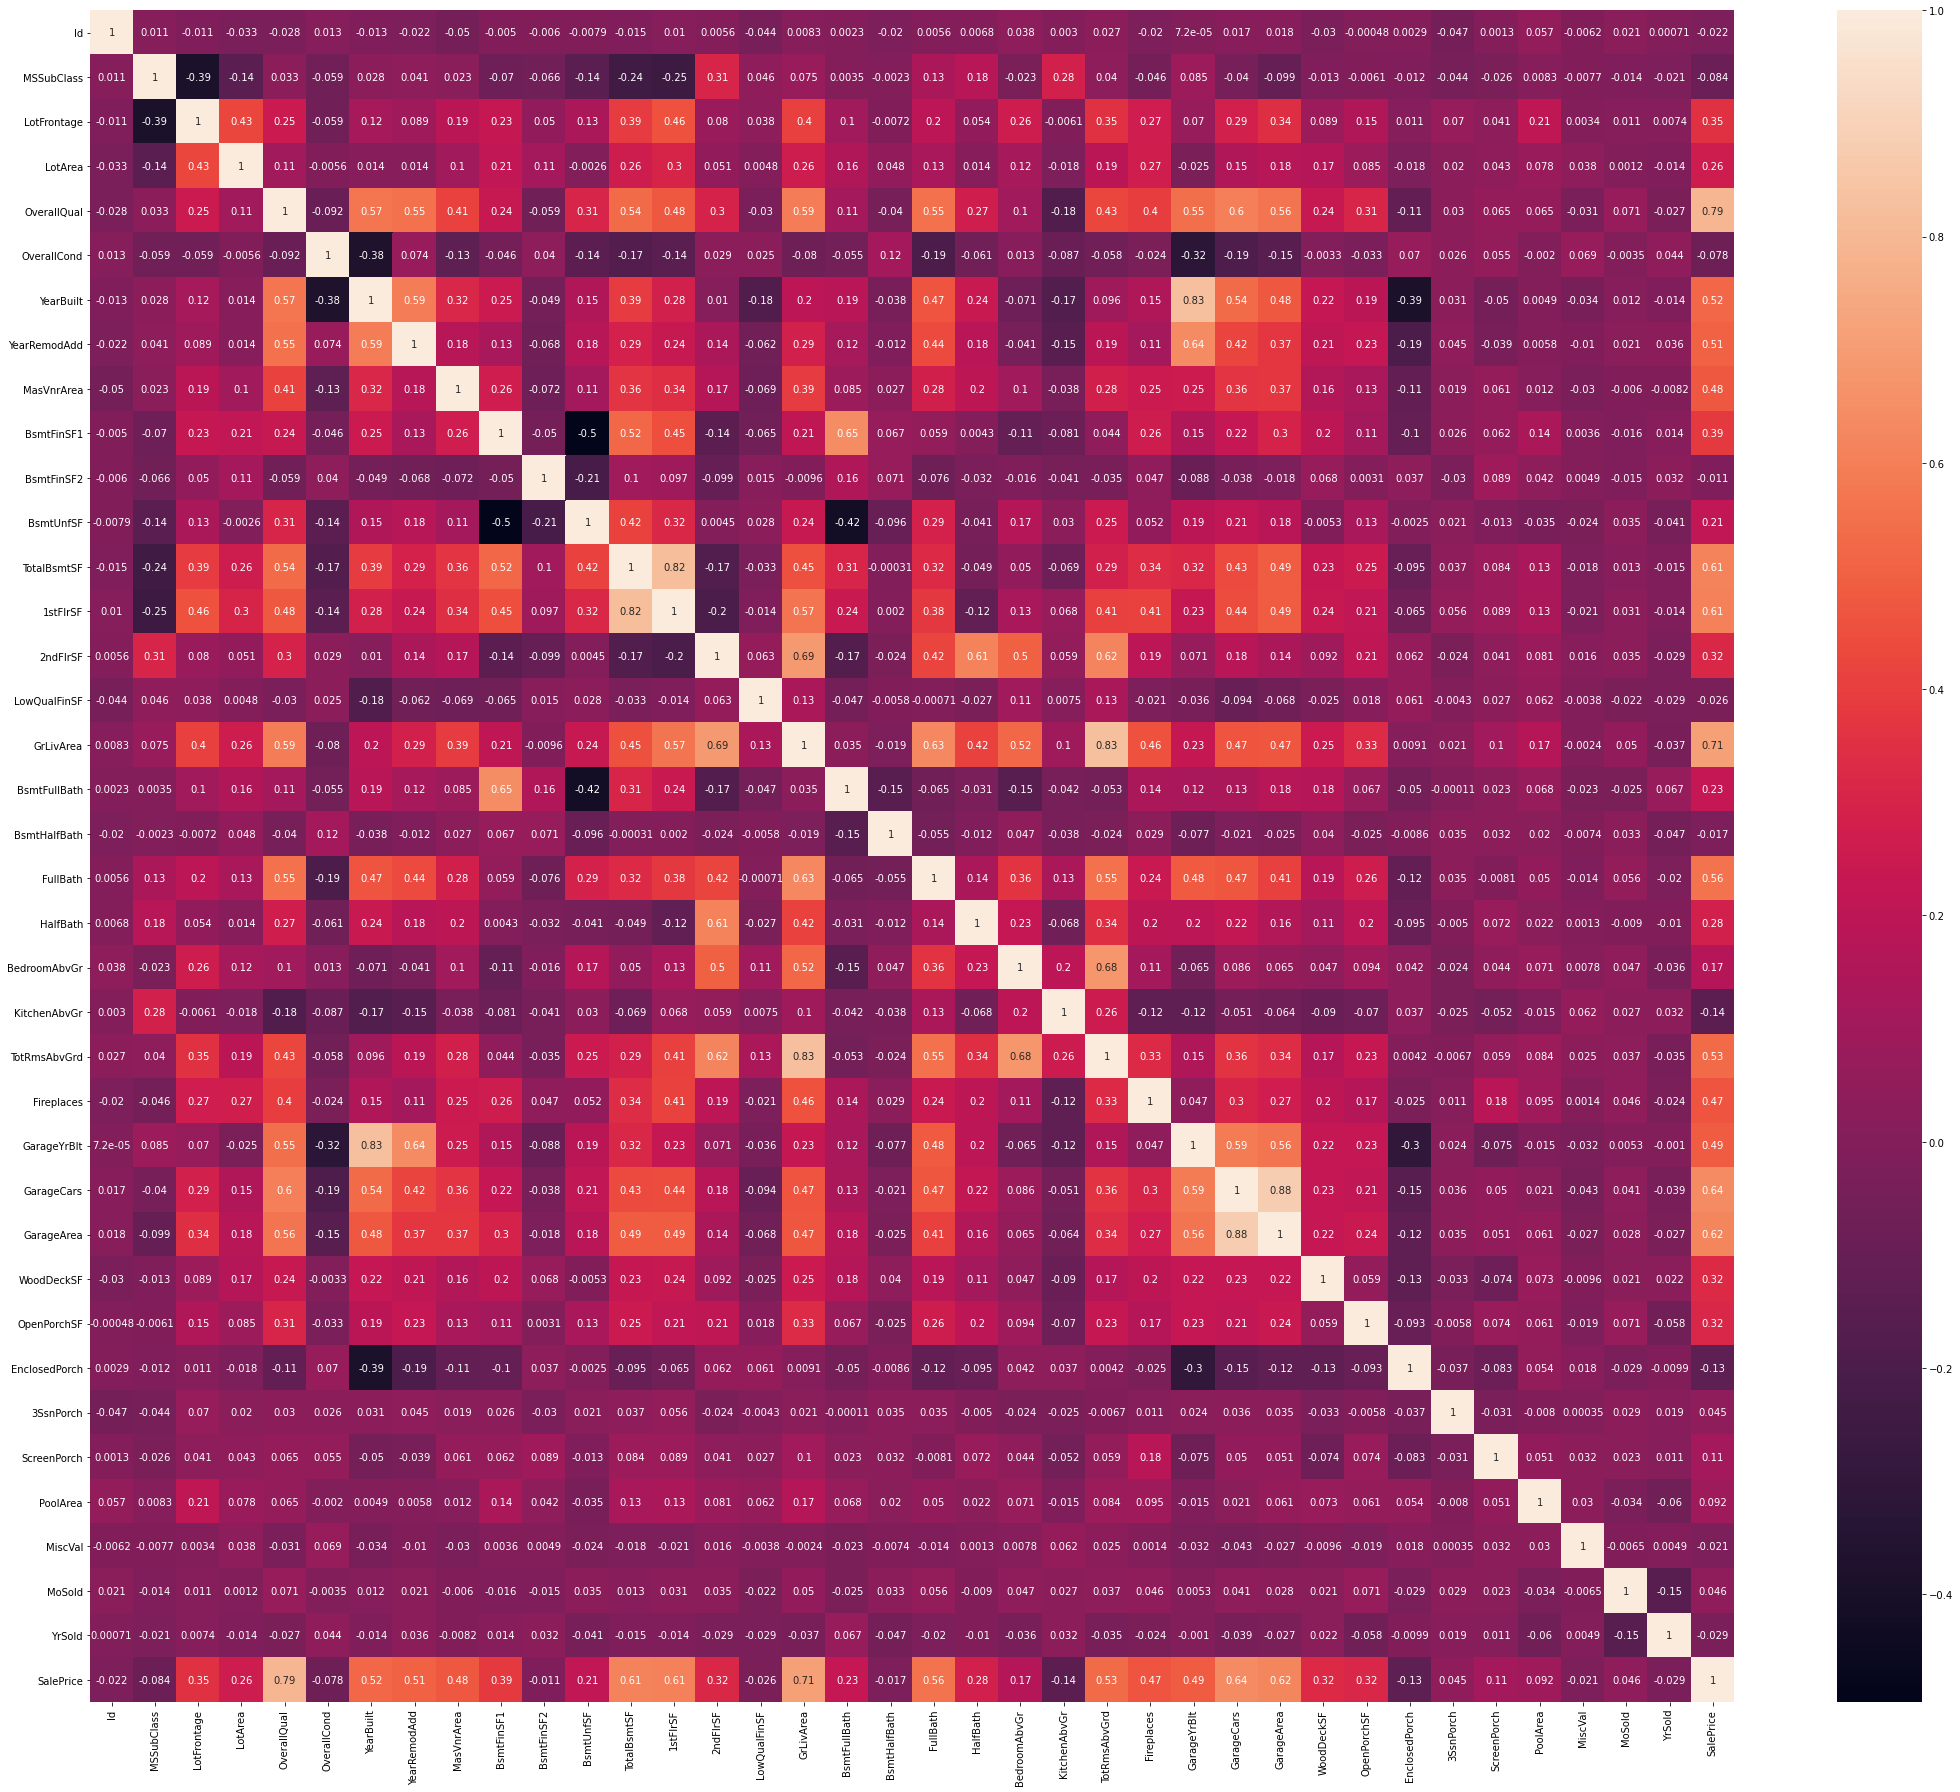

In [15]:
#Correlation matrix to show correlation between two variables, 0.x means x% similar
fig=plt.figure(figsize=(30,25))
corr_mat=data.corr()
sns.heatmap(corr_mat, annot=True)
plt.tight_layout()

In [16]:
x=data[['OverallQual','YearBuilt','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]
x.head()

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,7,2003,856,856,1710,2,8,2,548
1,6,1976,1262,1262,1262,2,6,2,460
2,7,2001,920,920,1786,2,6,2,608
3,7,1915,756,961,1717,1,7,3,642
4,8,2000,1145,1145,2198,2,9,3,836


In [17]:
y=data[['SalePrice']]
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=50)

In [19]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [20]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [21]:
reg.score(xtrain,ytrain)

0.7525018002320496

In [22]:
reg.score(xtest,ytest)

0.8348596195716924

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
poly=PolynomialFeatures(degree=2)

In [25]:
polytr=poly.fit_transform(xtrain)
polyts=poly.fit_transform(xtest)


In [26]:
reg.fit(polytr,ytrain)

LinearRegression()

In [27]:
reg.score(polytr,ytrain)

0.8548427247669464

In [28]:
reg.score(polyts,ytest)

0.8773611663884446

In [29]:
#above score is for 9 featuesr

In [30]:
#70 and 60%

In [31]:
x=data[['OverallQual','GrLivArea']]
y=data[['SalePrice']]

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=50)

In [33]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [34]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [35]:
reg.score(xtrain,ytrain)

0.7006780426746442

In [36]:
reg.score(xtest,ytest)

0.7657137883636594

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
poly=PolynomialFeatures(degree=2)

In [39]:
polytr=poly.fit_transform(xtrain)
polyts=poly.fit_transform(xtest)

In [40]:
reg.fit(polytr,ytrain)

LinearRegression()

In [41]:
reg.score(polytr,ytrain)

0.7603538964647044

In [42]:
reg.score(polyts,ytest)

0.8093710628942694

# All features Prediction

In [43]:
#check importance of each features

In [44]:
df_new=data._get_numeric_data()

In [45]:
df_new

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [46]:
df_new.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [47]:
x=df_new.drop(['MasVnrArea','LotFrontage','GarageYrBlt'],axis=1)
y=df_new[['SalePrice']]


In [48]:
x

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


# Scalling

In [49]:
#standard scaller
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
std=mms.fit_transform(x)
std

array([[0.00000000e+00, 2.35294118e-01, 3.34198042e-02, ...,
        9.09090909e-02, 5.00000000e-01, 2.41077628e-01],
       [6.85400960e-04, 0.00000000e+00, 3.87950174e-02, ...,
        3.63636364e-01, 2.50000000e-01, 2.03582836e-01],
       [1.37080192e-03, 2.35294118e-01, 4.65072799e-02, ...,
        7.27272727e-01, 5.00000000e-01, 2.61908068e-01],
       ...,
       [9.98629198e-01, 2.94117647e-01, 3.61868705e-02, ...,
        3.63636364e-01, 1.00000000e+00, 3.21621997e-01],
       [9.99314599e-01, 0.00000000e+00, 3.93418869e-02, ...,
        2.72727273e-01, 1.00000000e+00, 1.48902930e-01],
       [1.00000000e+00, 0.00000000e+00, 4.03701886e-02, ...,
        4.54545455e-01, 5.00000000e-01, 1.56367171e-01]])

In [50]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.5,random_state=10,shuffle=True)

# Model Training


In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model=LinearRegression()

In [53]:
model.fit(xtrain,ytrain)

LinearRegression()

In [54]:
model.score(xtrain,ytrain)

1.0

In [55]:
model.score(xtest,ytest)

1.0

In [56]:
x=np.array(x)

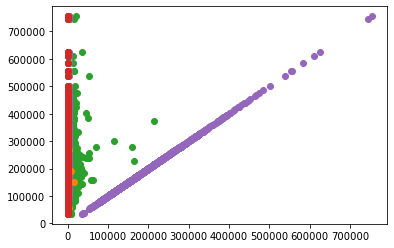

In [57]:
for i in range(35):
    plt.scatter(x[:,i],y)

# Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [59]:
rfr.fit(xtrain,ytrain)

<ipython-input-59-0288efa14dc0>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(xtrain,ytrain)


RandomForestRegressor()

In [60]:
rfr.score(xtest,ytest)

0.9912537861429526

# K Neighbor Classifier

In [62]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 5)

In [63]:
knr.fit(xtrain,ytrain)

KNeighborsRegressor()

In [64]:
knr.score(xtest,ytest)

0.9906541539610816

# Decision Tree Classifier

In [65]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [66]:
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [67]:
dtr.score(xtest,ytest)

0.9915548285297644

# Support Vector Regressor

In [72]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')

In [73]:
svr.fit(xtrain,ytrain)

C:\Users\Furqan Khalil\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR(kernel='linear')

In [74]:
svr.score(xtest,ytest)

0.9999999999996362